# **Import Libraries & Data**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import matplotlib.image as img
import pathlib
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.4 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
path=pathlib.Path('/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images')

In [4]:
Parasitized =list(path.glob('Parasitized/*'))
Uninfected =list(path.glob('Uninfected/*'))

In [5]:
len(Parasitized)

13780

In [6]:
len(Uninfected )

13780

# **Visualization**

In [7]:
data = {
    'Parasitized' : Parasitized,
    'Uninfected' : Uninfected
}

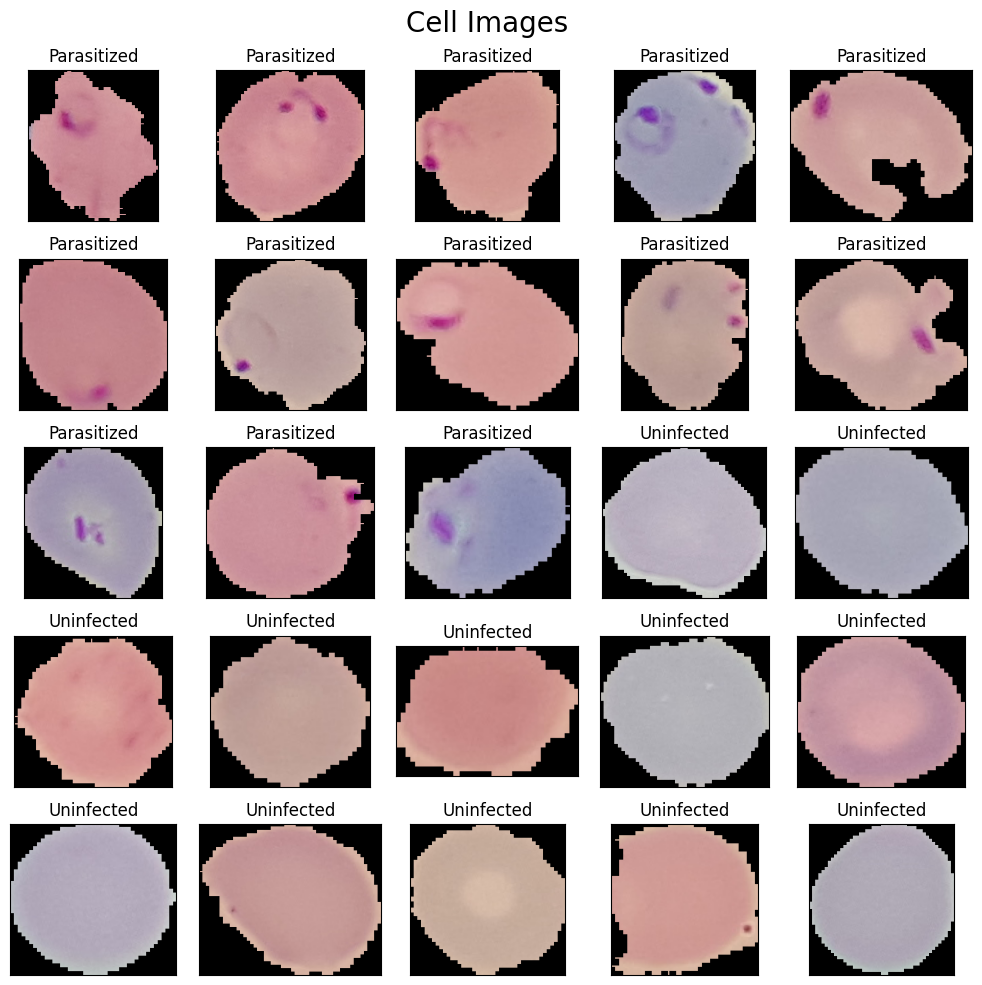

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
fig.suptitle("Cell Images", fontsize=20)

images = Parasitized[:13] + Uninfected[:12]  
axes = ax.flatten()

for index, image_path in enumerate(images):
    img_data = img.imread(image_path)  
    axes[index].imshow(img_data)  
    axes[index].set_xticks([])  
    axes[index].set_yticks([]) 
    if index < 13:
        axes[index].set_title("Parasitized")
    else:
        axes[index].set_title("Uninfected")


plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [9]:
data_generator = ImageDataGenerator(rescale = 1 / 255.0,validation_split=0.2)

In [10]:
train_data=data_generator.flow_from_directory(
    directory='/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 22048 images belonging to 2 classes.


In [11]:
test_data = data_generator.flow_from_directory(
    directory='/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)


Found 5510 images belonging to 2 classes.


# **Build The Model**

In [12]:
model = Sequential()

# First Convolutional block
model.add(Conv2D(filters=32, kernel_size=3, strides=(2, 2), padding='same', activation=None, input_shape=[128, 128, 3]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional block
model.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Third Convolutional block
model.add(Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same', activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
# Add Dropout
model.add(Dropout(0.4)) 

# Add Flatten Layer
model.add(Flatten())

# Fully connected layers with L2 regularization
model.add(Dense(256, activation=None, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation=None, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))




In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 260,033 (1015.75 KB)

 Trainable params: 258,817 (1011.00 KB)

 Non-trainable params: 1,216 (4.75 KB)

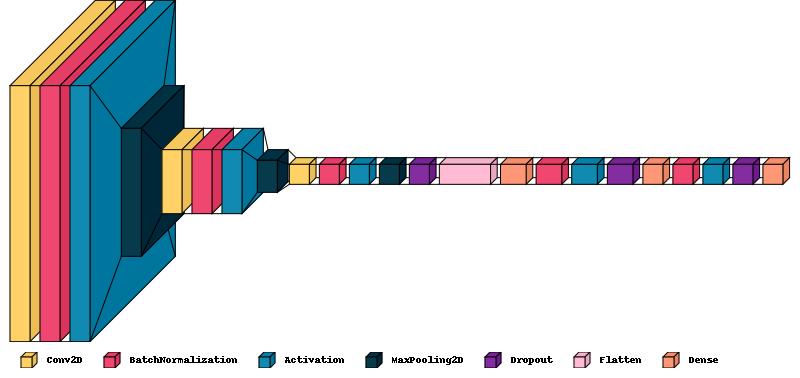

In [14]:
import visualkeras
visualkeras.layered_view(model, legend=True)

# **Compile Model**

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )


# **Train Model**

In [16]:
 model_performance = model.fit(train_data,
                              epochs = 10,
                              validation_data = test_data,
                              batch_size=64
                               
                              )

Epoch 1/10


I0000 00:00:1727280865.055586     132 service.cc:145] XLA service 0x7948c4009970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727280865.055642     132 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727280865.055646     132 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/689 ━━━━━━━━━━━━━━━━━━━━ 2:56:09 15s/step - accuracy: 0.4688 - loss: 5.9965

I0000 00:00:1727280874.613025     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 ━━━━━━━━━━━━━━━━━━━━ 179s 237ms/step - accuracy: 0.5702 - loss: 5.3374 - val_accuracy: 0.7405 - val_loss: 3.8208
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.7470 - loss: 3.4697 - val_accuracy: 0.9031 - val_loss: 2.3543
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.9077 - loss: 2.1271 - val_accuracy: 0.8966 - val_loss: 1.5425
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.9374 - loss: 1.3105 - val_accuracy: 0.9192 - val_loss: 0.9542
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.9419 - loss: 0.8212 - val_accuracy: 0.9236 - val_loss: 0.6495
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.9483 - loss: 0.5327 - val_accuracy: 0.9374 - val_loss: 0.4381
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.9494 - loss: 0.3874 - val_accuracy: 0.9343 - val_loss: 0.3746
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.9544 - loss: 0.2932 - val_accur

# **Evaluate The Model**

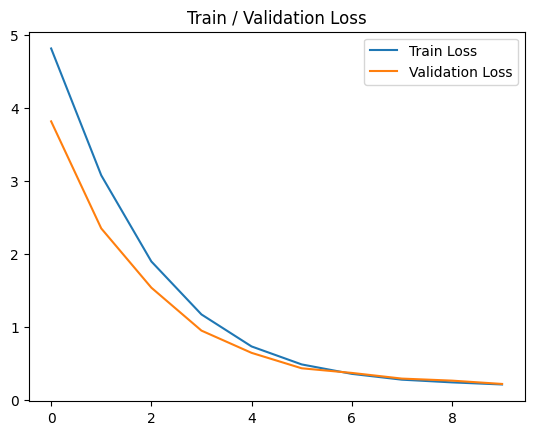

In [17]:
plt.plot(model_performance.history['loss'] , label = 'Train Loss')
plt.plot(model_performance.history['val_loss'], label = 'Validation Loss')
plt.title("Train / Validation Loss")
plt.legend()
plt.show()

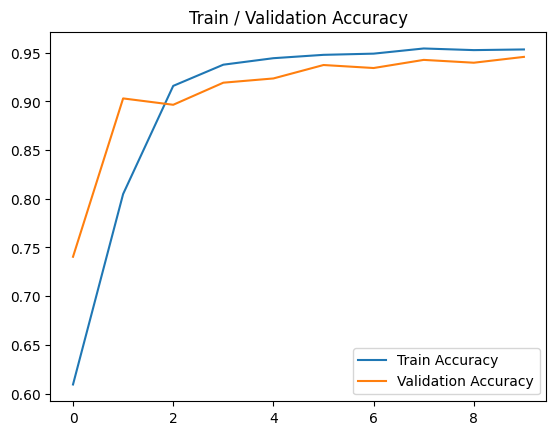

In [18]:
plt.plot(model_performance.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_performance.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Train / Validation Accuracy")
plt.legend()
plt.show()

In [19]:
train_loss,train_acc=model.evaluate(train_data)
print(f'Train_Accuracy: {train_acc}')
print(f'Train_Loss: {train_loss}')

689/689 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.9617 - loss: 0.1741
Train_Accuracy: 0.9627177119255066
Train_Loss: 0.17099574208259583


In [20]:
test_loss,test_acc=model.evaluate(test_data)
print(f'Test_Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9436 - loss: 0.2284
Test_Accuracy: 0.9457350373268127
Test Loss: 0.2234015166759491


# **Save Model**

In [21]:
model.save('model.h5')

# **Make Predictions**

In [23]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
class_names = {
    0: 'Uninfected',
    1: 'Parasitized'
}

# Load and prepare the image
def load_image(filename):
    img = load_img(filename, color_mode='rgb', target_size=(128, 128))
    # Convert to array
    img = img_to_array(img)
    # Reshape into a single sample with 3 channels
    img = img.reshape(1, 128, 128, 3)
    # Prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load an image and predict the class
def run_example():
    img = load_image('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_48.png')
    model = load_model('model.h5')
    result = model.predict(img)
    # Get the predicted class index
    predicted_class_index = np.argmax(result, axis=-1)[0] 
    predicted_class_name = class_names[predicted_class_index]
    
    print("Predicted class index:", predicted_class_index)
    print("Predicted class name:", predicted_class_name)

run_example()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicted class index: 0
Predicted class name: Uninfected
